# Sentiment Analysis of Indigo Tweets using NLP

Customer feedback is very important for every organization, and it is very valuable if it is honest!
Twitter is one of the best platforms to capture honest customer reviews and opinions.
The number one priority is to understand the mood of the customers by looking at their feedback text. Whether they are happy, sad, or angry! This is known as Sentiment Analysis.
Analysing Sentiment of customer can provide insight to the organixation


## Problem Statement

There are many ways to perform sentiment analysis. Popular ones are the bag of words model and Textblob. In this post, I am going to show you how can you do sentiment analysis on a given text data using Textblob.This model attempts to have the machine actually understand 
the sentences structures, context, and is more focused on the succession of a string of words. Usually, this structure requires the machine to have understanding of grammar principles. To do this, Natural Language Processing (NLP) techniques are used to tag parts of speech,
named entities, and more, in order to actually understand the "language" of the text, and not just look for target words 
The process will be
* Importing Libraries
* Reading data into Python
* Sentiment Analysis using NLP
* Visualizing Words using Word Clouds
* Creating Bingram using Textblob
* Conclusion



## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data into Python

In [2]:
IndigoTweets=pd.read_csv("C:\\Users\\DEBARATI CHATTERJEE\\Documents\MLDl\\ALL Python ML notebooks\\Python Datasets\\Sentiment Analysis\\Indigo Tweets.csv", encoding='latin')
print(IndigoTweets.shape)
IndigoTweets.head()

(1077, 1)


,Tweets
0,Hackers galore Also being sued for passed deb...
1,Hackers galore Also being sued for passed deb...
2,London England UK Come rock with ya girl Fri...
3,NewsAlert BengaluruVijaywada Indigo flight 6E...
4,Hackers galore Also being sued for passed debt...


In [3]:
PositiveWords=pd.read_table("C:\\Users\\DEBARATI CHATTERJEE\\Documents\MLDl\\ALL Python ML notebooks\\Python Datasets\\Sentiment Analysis\\Positive_words.txt",encoding='latin-1')
NegativeWords=pd.read_table("C:\\Users\\DEBARATI CHATTERJEE\\Documents\MLDl\\ALL Python ML notebooks\\Python Datasets\\Sentiment Analysis\\Negative_words.txt",encoding='latin-1')

In [4]:
PositiveWords.head()

,PositiveWords
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [5]:
NegativeWords.head()

,NegativeWords
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


## Sentiment Analysis using NLP

In [6]:
# Converting the sample text to a blob
def ComputeSentimentScoreNLP(inputSentence):
    import re
    from textblob import TextBlob
    
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',inputSentence)
    
    # Generating textblob object
    SampleTextInBlobFormat = TextBlob(WordList)
    
    # Generating sentiment score
    Score=SampleTextInBlobFormat.sentiment[0]
    #print(Score)
    
    if(Score > 0):
        OverallSentiment='Positive'
    
    elif(Score == 0):
        OverallSentiment='Neutral'
    
    else:
        OverallSentiment='Negative'
        
    return(OverallSentiment)

In [7]:
# Calling sentiment score function for every tweet
IndigoTweets['Sentiment']=IndigoTweets['Tweets'].apply(ComputeSentimentScoreNLP)
IndigoTweets.head()

,Tweets,Sentiment
0,Hackers galore Also being sued for passed deb...,Negative
1,Hackers galore Also being sued for passed deb...,Negative
2,London England UK Come rock with ya girl Fri...,Neutral
3,NewsAlert BengaluruVijaywada Indigo flight 6E...,Neutral
4,Hackers galore Also being sued for passed debt...,Negative


<Axes: >

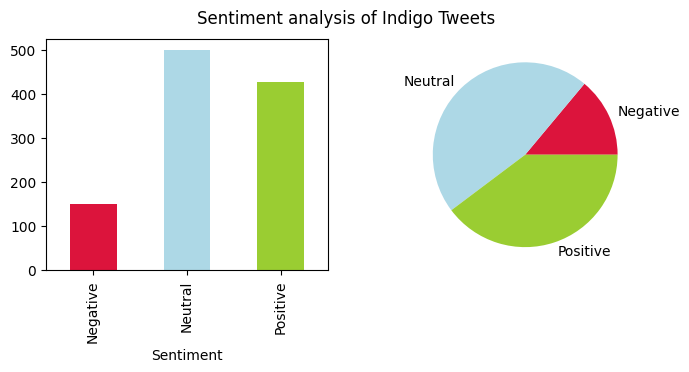

In [8]:
# Visualizing the overall sentiment distribution
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(8,3))
fig.suptitle("Sentiment analysis of Indigo Tweets")

# Grouping the data
GroupedData=IndigoTweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue','yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue','yellowgreen'])

## Visualizing Words using Word Clouds

In [51]:
positive_tweet = IndigoTweets[IndigoTweets['Sentiment'] == 'Positive']['Tweets']
strP = positive_tweet.sum()

In [54]:
negative_tweet = IndigoTweets[IndigoTweets['Sentiment'] == 'Negative']['Tweets']
strN = negative_tweet.sum()

In [52]:
# Cleaning the text data to remove all punctuations, numbers and special characters
def cleanfunc(str):

    import re

# removing all the special characters
# Just a template to show how it can be done Selectively
    cleanedArticle = re.sub(r'[?|$|.|!]',r' ',str)

# removing everything which is not Alphabets
    cleanedArticle = re.sub(r'[^a-z A-Z]',r' ',cleanedArticle)

# Converting the whole text to lowercase
    cleanedArticle = cleanedArticle.lower()     

# Deleting any word which is less than 3-characters mostly those are stopwords
    cleanedArticle= re.sub(r'\b\w{1,3}\b', ' ', cleanedArticle)

# Stripping extra spaces in the text
    cleanedArticle= re.sub(r' +', ' ', cleanedArticle)

    return cleanedArticle

In [57]:
cleanedpositivearticle = cleanfunc(strP)
cleanedpositivearticle

'just because available denim tiedye indigo leather dope style love indigo jael maybe make song together have reasons like indigo they were first announce which conveyor belt your luggage coming their flight exactly parents dont english hindi save their lives case emergency indigo spicejet stunning indigo from dear very talented friend check work haven alread looking forward easter weekend chocolate plush bunnies kids books more weve everything love opula range from utopia featured showroom with genuine grey woodlike tile wall love opula range from utopia featured showroom with genuine grey woodlike tile wall great have this lovely from foraging plant dyes studio todays delicious buffet yummy indigo buffet this ethereal blue gold upcycled indigo silk scarf lucky buyer france plenty others this ethereal blue gold upcycled indigo silk scarf lucky buyer france plenty have reasons like indigo they were first announce which conveyor belt your luggage coming york naples italy march book here

In [55]:
def wordgroupby(CleanedArticle):

    WordList=cleanedArticle.split()

# Creating a Dataframe
    WordData=pd.DataFrame(data= pd.Series(WordList), columns=['words'])

# Finding the top frequency words|
    word_groupby=WordData.groupby('words').size().nlargest(20)
    
    return word_groupby

In [58]:
wordgroupby(cleanedpositivearticle)

words
indigo          125
this             30
with             25
cold             20
spain            20
aircraft         17
need             17
from             13
ground           13
last             13
made             13
your             13
week             12
bodleian         11
conservators     11
here             11
library          11
little           11
order            11
workshop         11
dtype: int64

In [64]:
def wordcloudinmagegeneration(cleanedArticle):

    from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
    customStopwords=list(STOPWORDS) + ['indigo', 'book','flight','aircraft']

    wordcloudimage = WordCloud( max_words=200,
                                font_step=2 ,
                                max_font_size=500,
                                stopwords=customStopwords,
                                width=1000,
                                height=720
                                ).generate(cleanedArticle)

    plt.figure(figsize=(20,8))
    plt.imshow(wordcloudimage)
    plt.axis("off")
    plt.show()
    
    return wordcloudimage

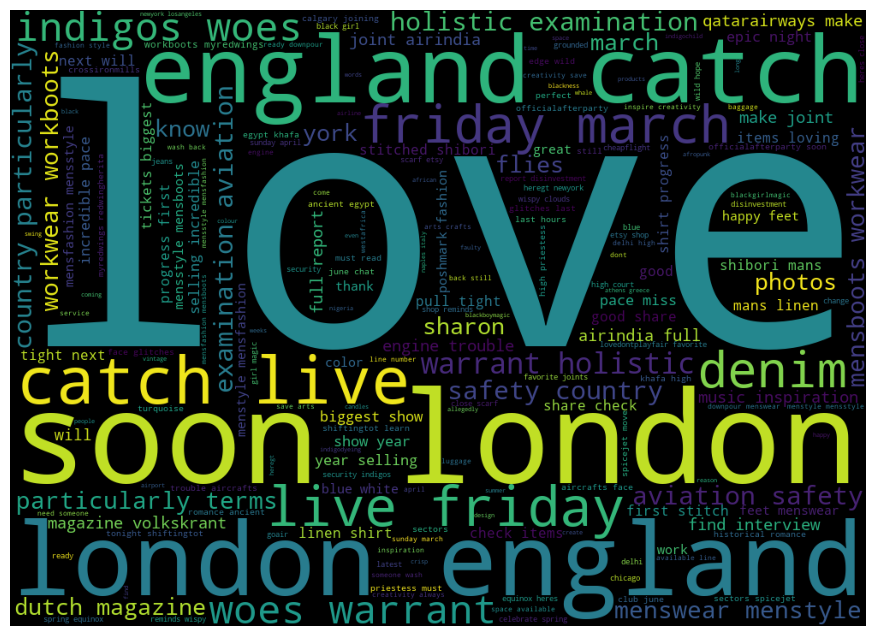

In [65]:
wordcloudinmagegeneration(cleanedpositivearticle)

In [61]:
cleanednegativearticle = cleanfunc(strN)
cleanednegativearticle

' hackers galore also being sued passed debt from small town population lawyer serves supreme court hackers galore also being sued passed debt from small town population lawyer serves supreme court hackers galore also being sued passed debt from small town population lawyer serves supreme start boarding when your aircraft ready hoard passengers sickening experience indigo airlineindigo when will seriously arrive customer service front tired before journey beginhere some benefits indigo name indigo naturaldye aizomebedding japan startup they need learn manage expenses look other airlines they indigo workshop with conservators bodleian library last year made little indigo ground mixed need empaths sensitive souls indigo energies this world need those aren afraid chan tuesdaytip spring break activities indigo week long springbreak notreallyspring indooractivities raleigh chevron selvedge jean limited edition raleighdenimworkshop budget carriers indigo goair whose aircraft were grounded av

In [63]:
wordgroupby(cleanednegativearticle)

words
indigo          125
this             30
with             25
cold             20
spain            20
aircraft         17
need             17
from             13
ground           13
last             13
made             13
your             13
week             12
bodleian         11
conservators     11
here             11
library          11
little           11
order            11
workshop         11
dtype: int64

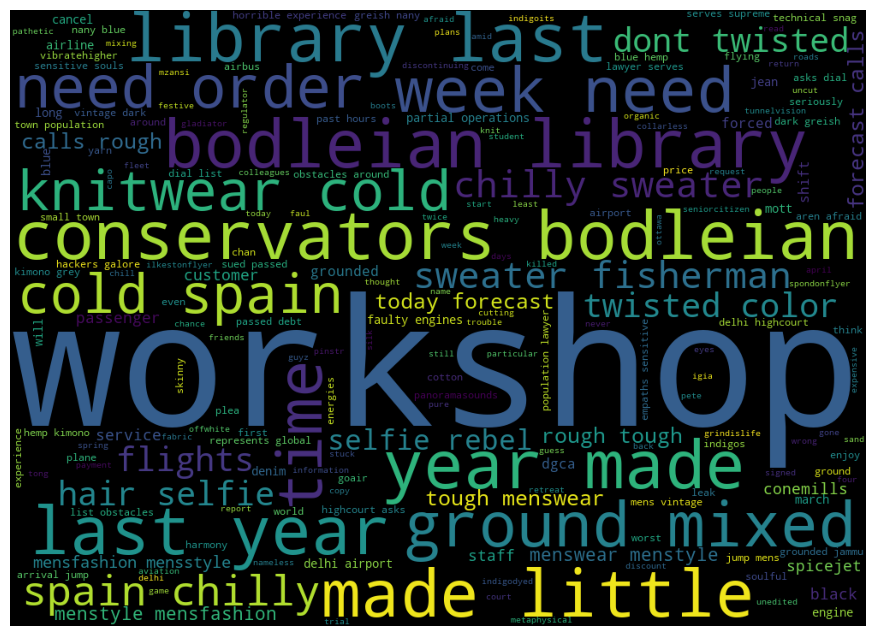

In [70]:
wordcloudinmagegeneration(cleanednegativearticle)

## Creating Bingram using Textblob

In [20]:
# The nltk corpus required to run below cell
import nltk
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to C:\Users\DEBARATI
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DEBARATI
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

######## Before Underscore #########
['denim tiedye indigo leather dope style bag', 'indigo jael', 'i song', 'indigo', 'conveyor', 'exactly', 'english', 'hindi', 'emergency indigo spicejet', 'stunning', 'friend check', 'haven t alread', 'easter', 'chocolate', 'plush bunnies kids books', 'opula', 'utopia', 'genuine grey', 'woodlike tile', 'opula', 'utopia', 'genuine grey', 'woodlike tile', 'plant dyes', 'studio xxx', 'todays', 'delicious buffet yummy indigo buffet', 'indigo silk scarf', 'lucky buyer', 'france', 'indigo silk scarf', 'lucky buyer', 'france', 'indigo', 'conveyor', 'york', 'naples italy', 'rt march', 'heregt naples italy', 'york', 'athens greece', 'rt march', 'heregt athens greece', 'york', 'london uk', 'april', 'heregt newyork london', 'uk cheapflight', 'york', 'los angeles', 'march', 'heregt', 'losangeles', 'colorful touch', 'business meetings', 'conference room', 'colorsofindigo colors', 'york', 'chicago', 'march', 'heregt', 'losangeles', 'chicago', 'york', 'rt march', '

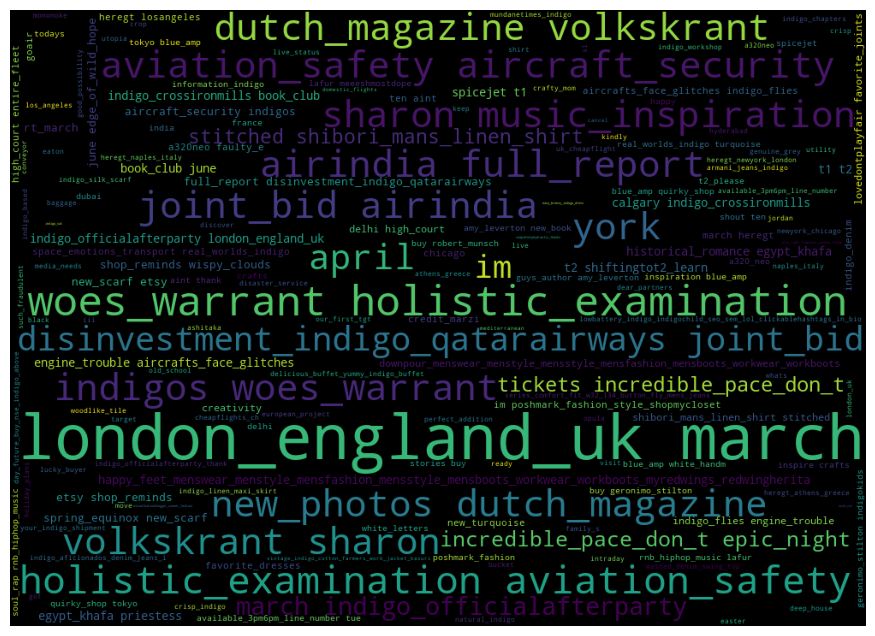

In [67]:
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(strP)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases
print('######## Before Underscore #########')
print(NounPhrases)

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['indigo', 'book','flight','aircraft']

wordcloudimage = WordCloud( max_words=200,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

######## Before Underscore #########
['hackers', 'small town population', 'supreme court hackers', 'small town population', 'supreme court hackers', 'small town population', 'supreme cou', 'hoard passengers', 'sickening', 'indigo', 'customer service front', 'tired', 'indigo naturaldye', 'japan', 'manage expenses', 'indigo', 'bodleian', 'made', 'indigo dye vat', 'sensitive souls', 'indigo energies', 'aren t', 'tuesdaytip', 'indigo', 'long springbreak', 'raleigh chevron selvedge jean limited edition', 'budget', 'indigo', 'goair', 'a320 neo', 'aviation regulator', 'dgca', 'indigo', 'bodleian', 'made', 'indigo dye vat', 'isla fisher', 'parker smith twisted seam skinny jeans kaleya', 'december', 'indigo', 'bodleian', 'made', 'indigo dye vat', 'dont', 'indigo hair selfie rebel', 'indigo', 'abt time', 'project whats yours', 'comment', 'bellow indigoapparelstore', 'indigo', 'bodleian', 'made', 'indigo dye vat', 'indigo', 'pawn shop', 'indigo', 'predictiveengines intraday', 'indigo', 'amid', 'e

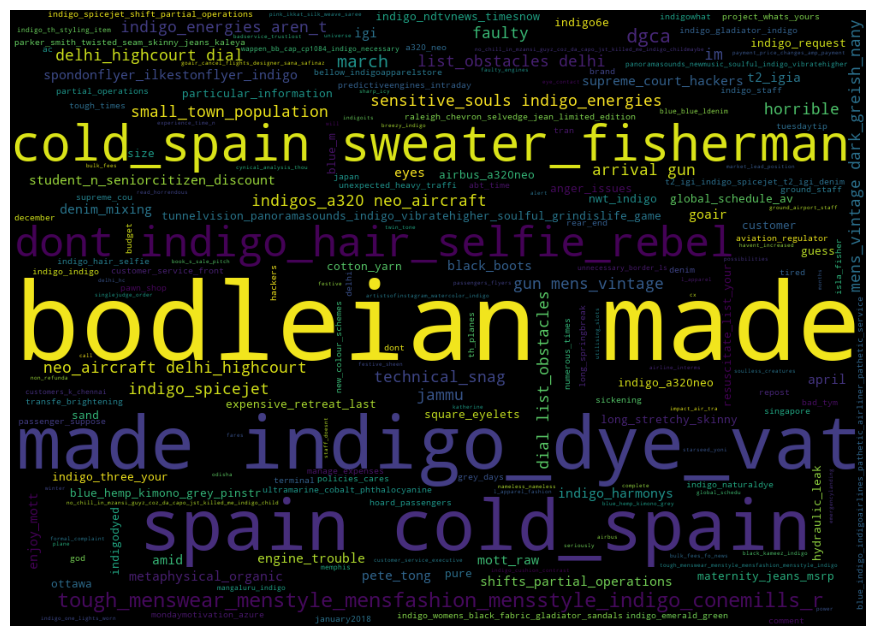

In [68]:
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(strN)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases
print('######## Before Underscore #########')
print(NounPhrases)

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['indigo', 'book','flight','aircraft']

wordcloudimage = WordCloud( max_words=200,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## Conclusion

With NLP we can find insight about Indigo tweets, whether customer is happy or not.
From above provess we can finf that 
* People are less negative than positive, mosly neutral about the service. 
* By Word Cloud image we can find that 'London'/'England' are most visible words in positive tweets. Where as 'cold'/'Spain' are most visible words in negative twwts.
* From Bingram analysis we can see that people are happy about England/London Indigo Service. People are worried about cold weather in Spain
